# Domain Analysis

**Which Factors Influence the Price of Health Insurance?**
Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

-  age: age of primary beneficiary

-  sex: insurance contractor gender, female, male

-  bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight(kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9

-  children: Number of children covered by health insurance / Number of dependents

-  smoker: Smoking

-  region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

# Importing Modules And Reading file.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('datasets_13720_18513_insurance(1).csv')  # Reading csv file

In [3]:
data # Printing data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Basic Checks

In [4]:
data.head() # first 5 rows of data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail() # Last 5 rows of data

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Insights:**

There are 0 null values in dataset. And dataset is having 4 numerical features and 3 categorical feature.

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Insights:**

Here we can see the range of age of persons is between 18 to 64. and range of bmi is between 15.96 to 53.13.

In [8]:
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


**Insights:**

1. There are 4 numerical and 3 categorical features.

2. There are no null values present in this dataset.

3. The age of persons is between 18 to 64 with bmi in range 15.96 to 53.13 and having 0 to 5 childrens.

# Exploratory Data Analysis

### Univariant Analysis

In [9]:
import sweetviz as sv

my_report=sv.analyze(data)

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
data1=data[['age','bmi']] # Continuous data.
data2=data[['sex','smoker','region','children']] # Categorical and discrete data.

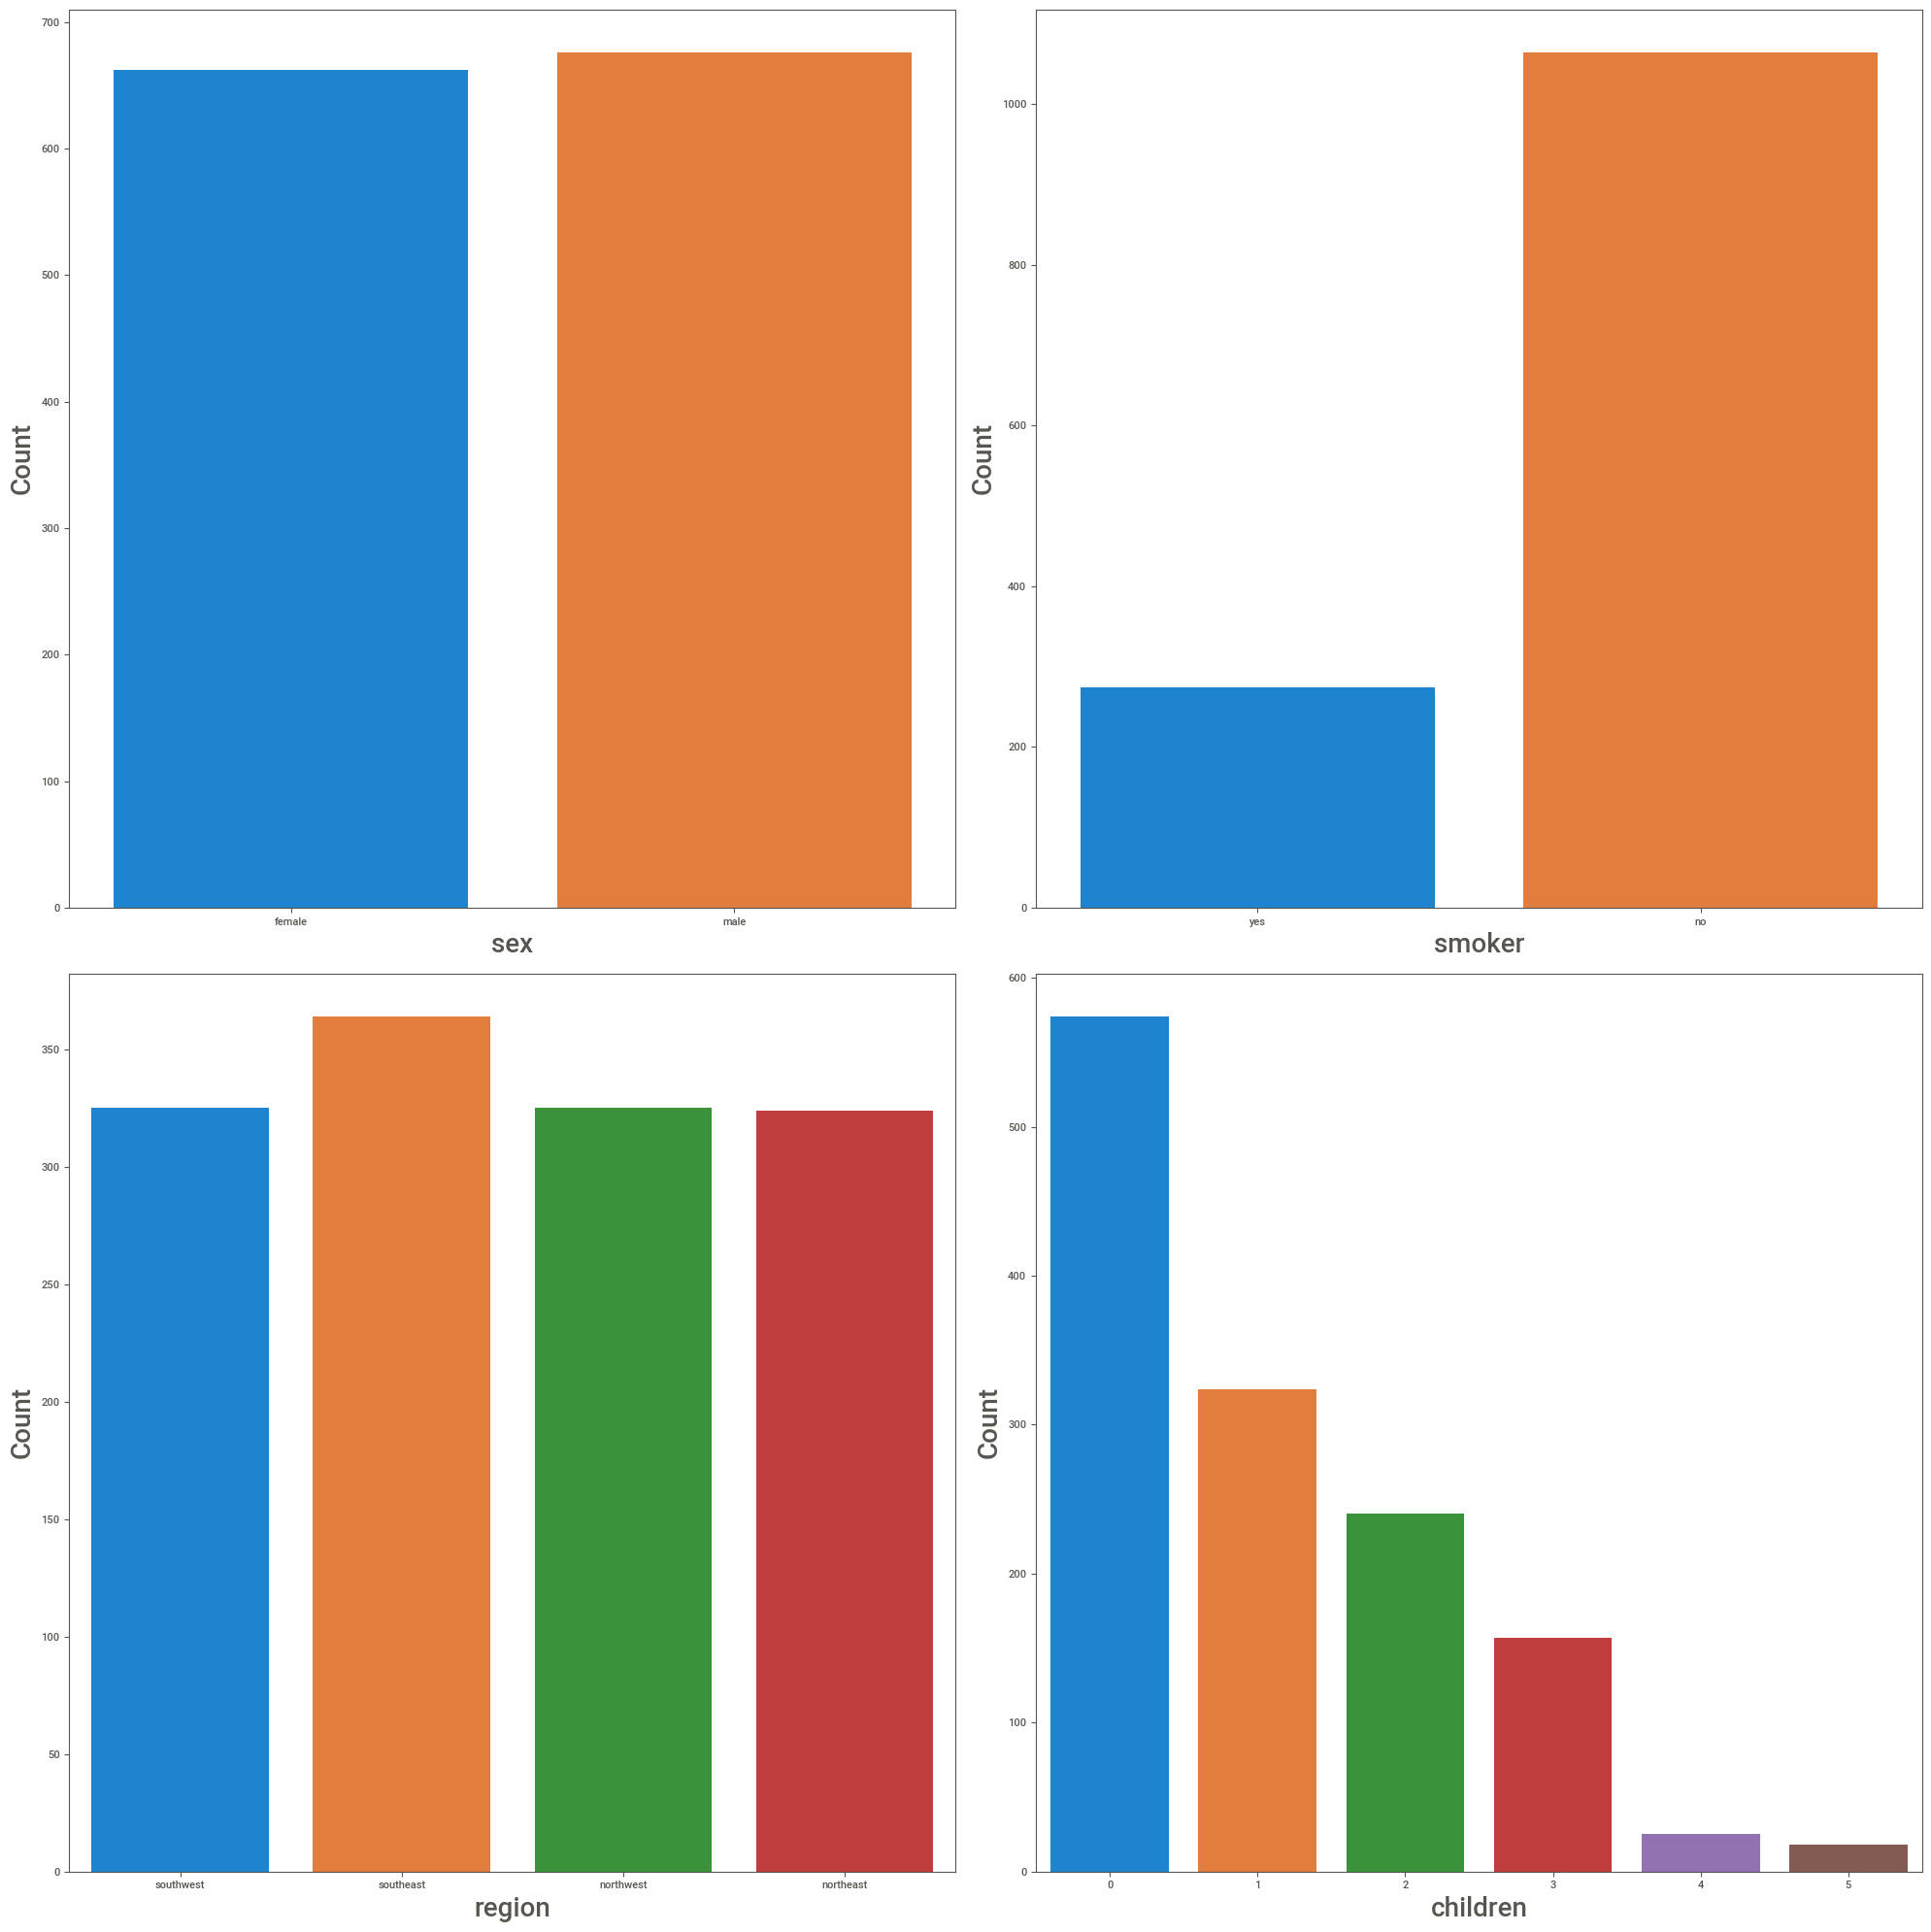

In [11]:
# For categorical and discrete data we will find correlation through countplot.
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data2:
    ax=plt.subplot(2,2,plotnumber)
    sns.countplot(x=column,data=data2)
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Insights**

**Sex:** Female and Male have almost equal count.

**Smoker:** We have data of non-smoker.so may be possible that data will get biased to non smoker.

**Children:** Maximum people are not having childrens.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


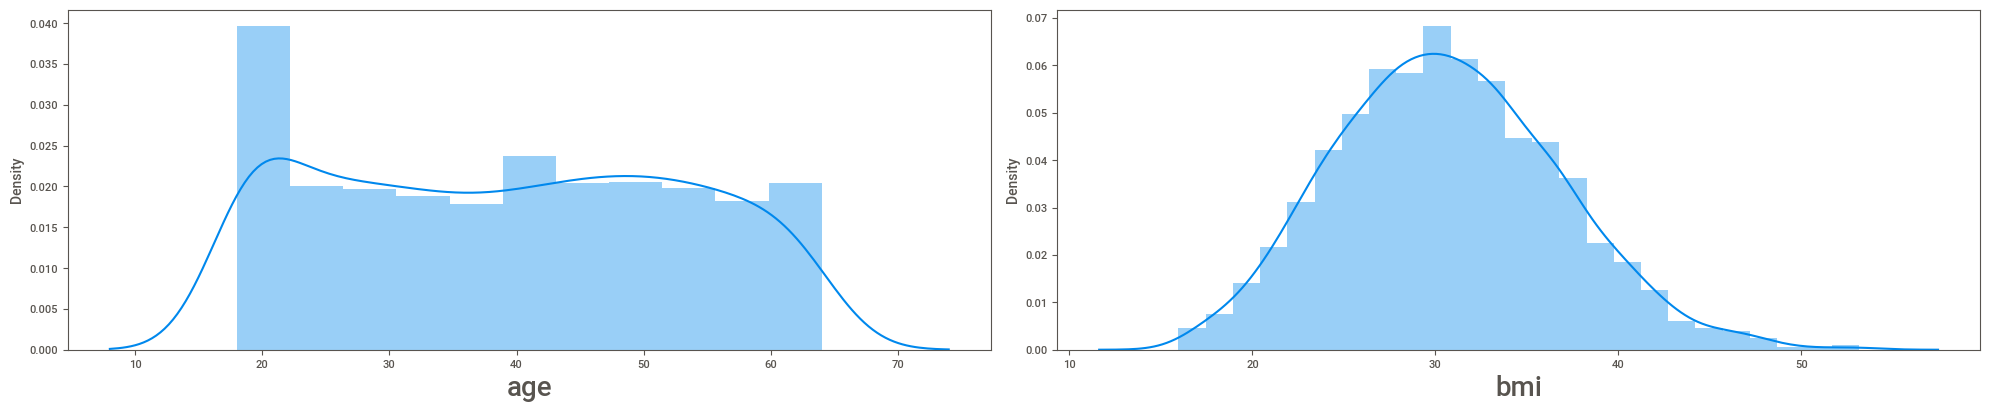

In [12]:
# For continuous data we will find correlation through distplot.
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data1:
    ax=plt.subplot(5,2,plotnumber)
    sns.distplot(data1[column])   
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Insights:**

**Age:** Except 20,remaining age group following uniform distribution.

**BMI:** It is showing normal distribution.

### Bivariant Analysis

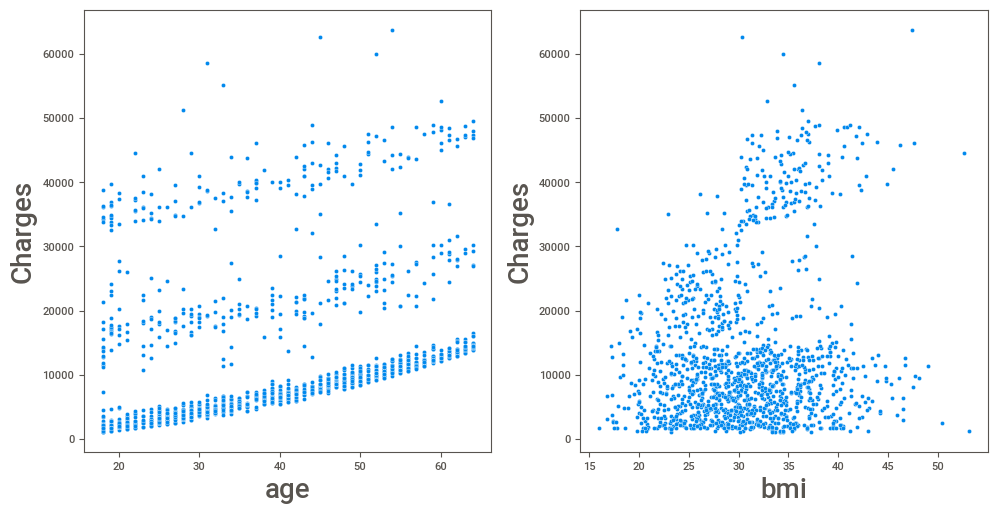

In [13]:
# For continuous data we will find correlation through scatterplot.
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data1:
    ax=plt.subplot(4,4,plotnumber)
    sns.scatterplot(x=column,y=data.charges,data=data1)
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Charges',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Insights:**

1.Here we can see if age is increasing then charges will also increase.

2.There is no definite relationship between bmi and charges.

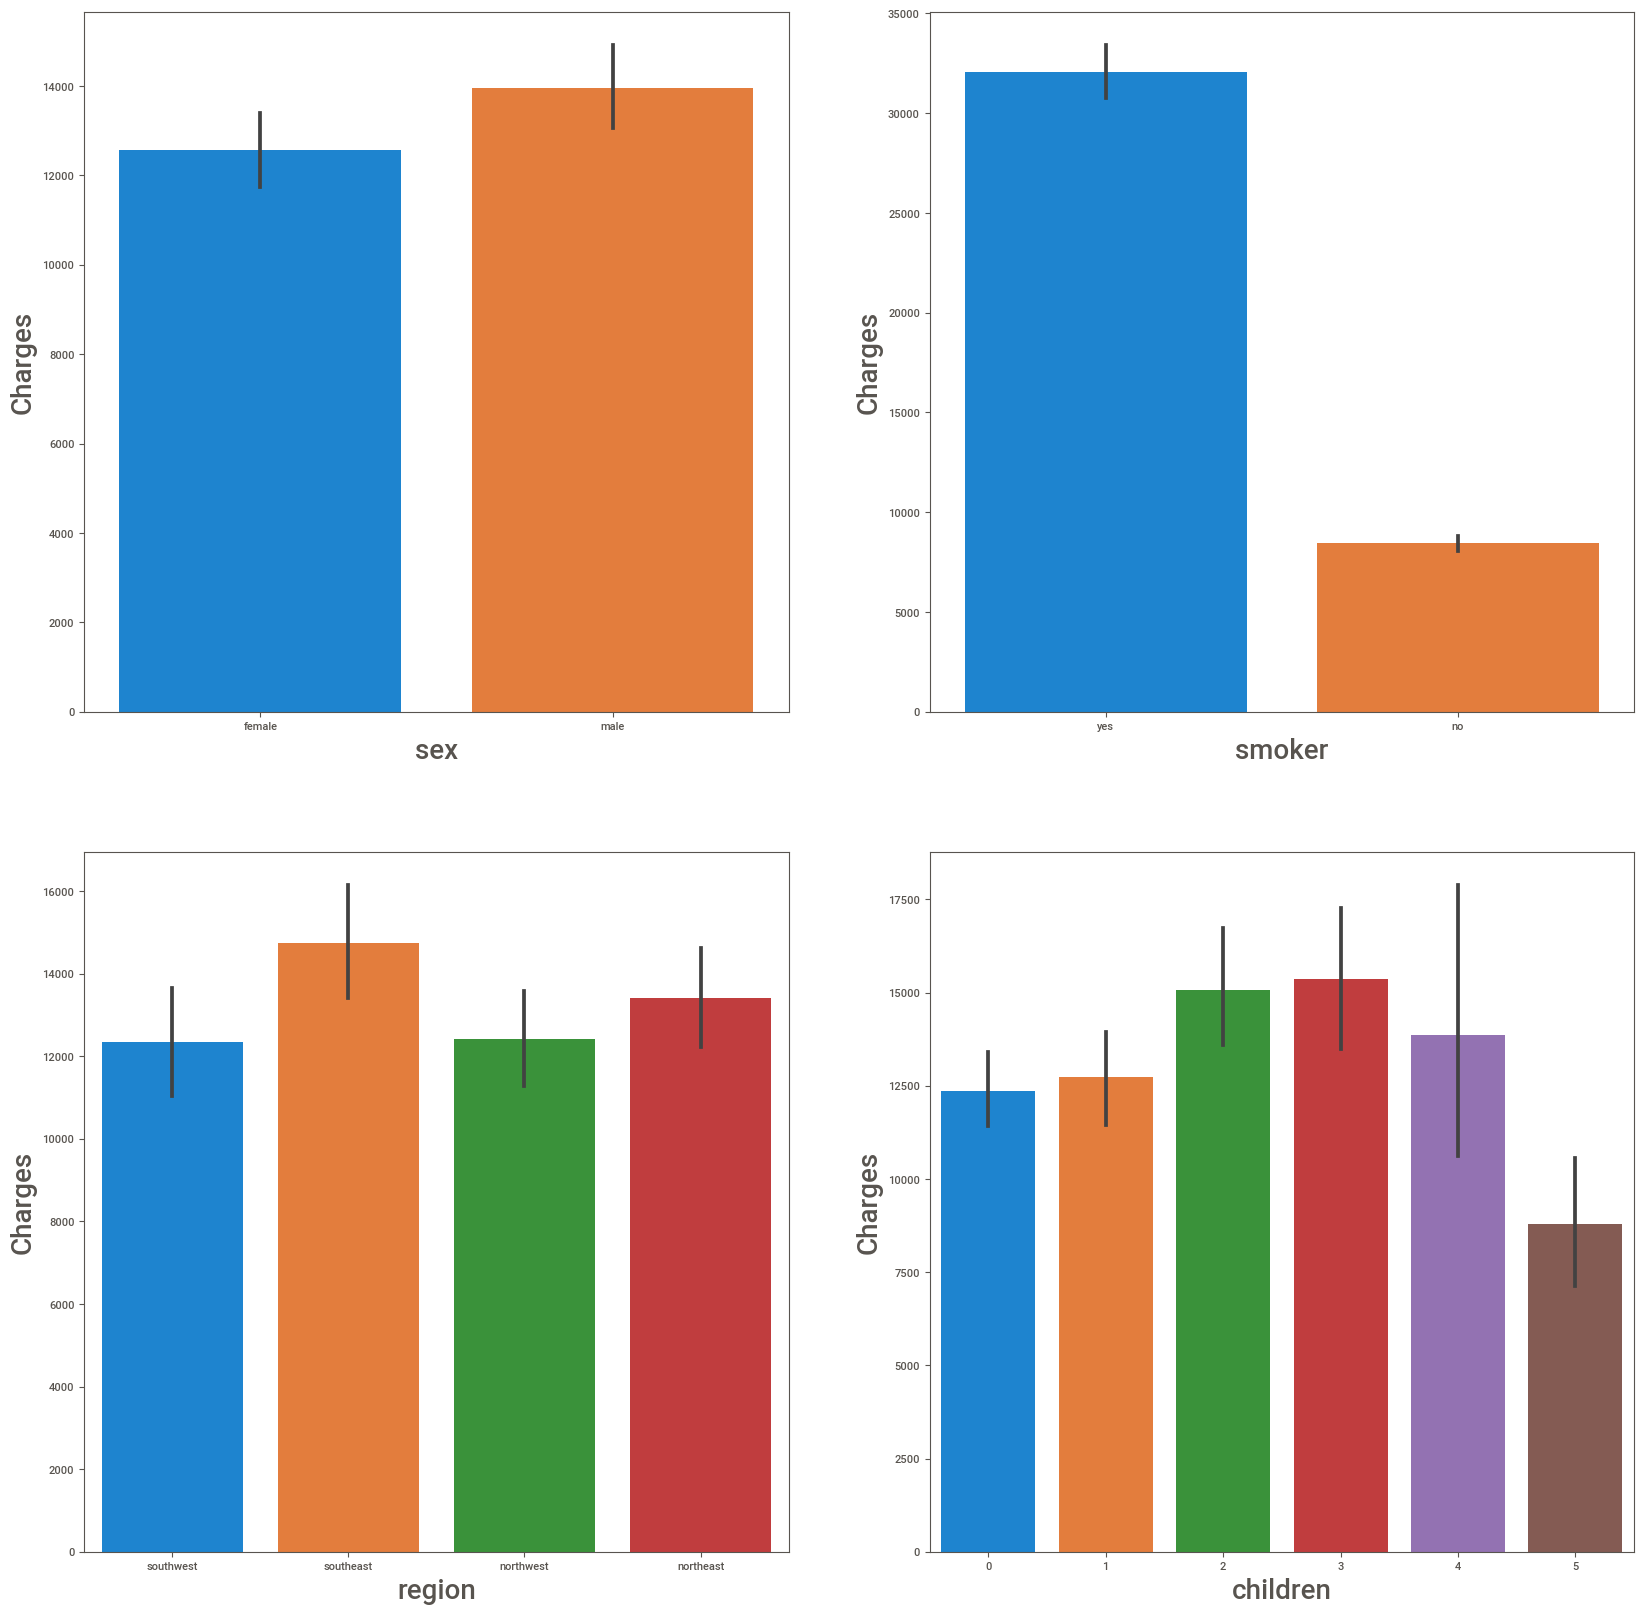

In [14]:
# for categorical data we will check relation through countplot
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data2:
    ax=plt.subplot(2,2,plotnumber)
    sns.barplot(x=column, y=data.charges,data=data2)
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Charges',fontsize=20)
    plotnumber+=1
plt.show()

**Insights:**

**Smoker:** If person is smoking, then Insurance charges will increase.

**Children:** As no of childrens increasing, Insurance charges are also increasing. 

Note: For 4 and 5, may be we have less data. that's why it is getting biased 

### Checking Outliers

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


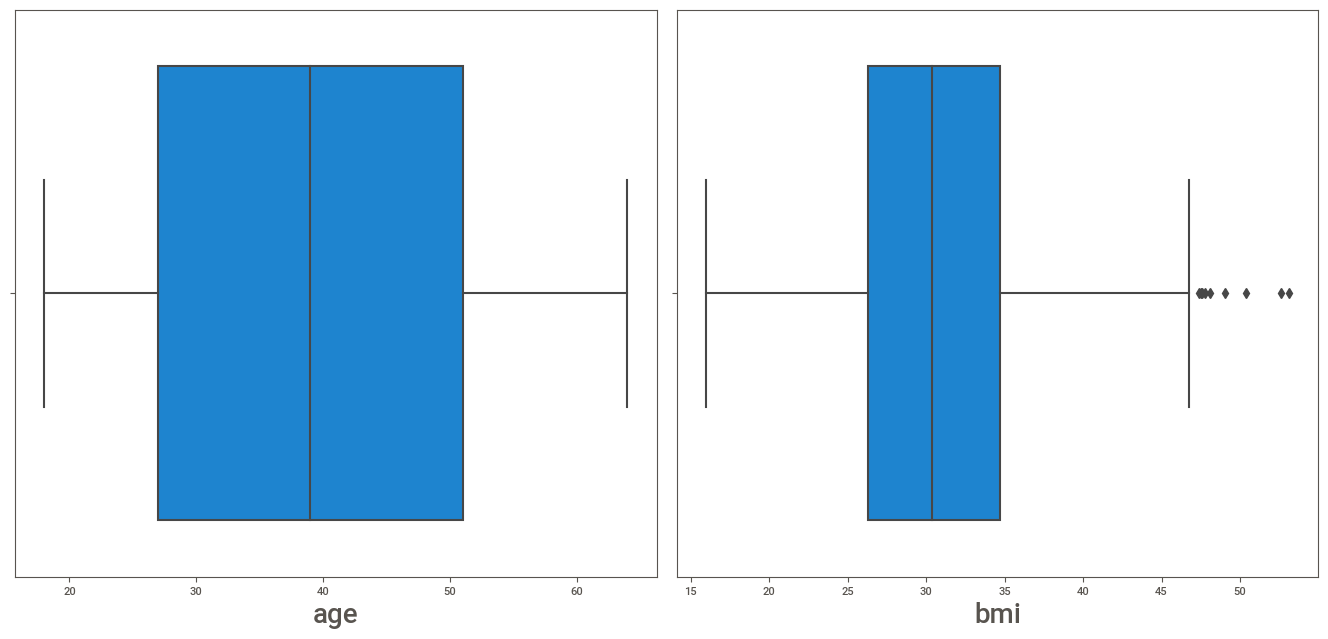

In [15]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

**There are some outliers present in bmi. We will remove it later.**

### Multivariant Analysis

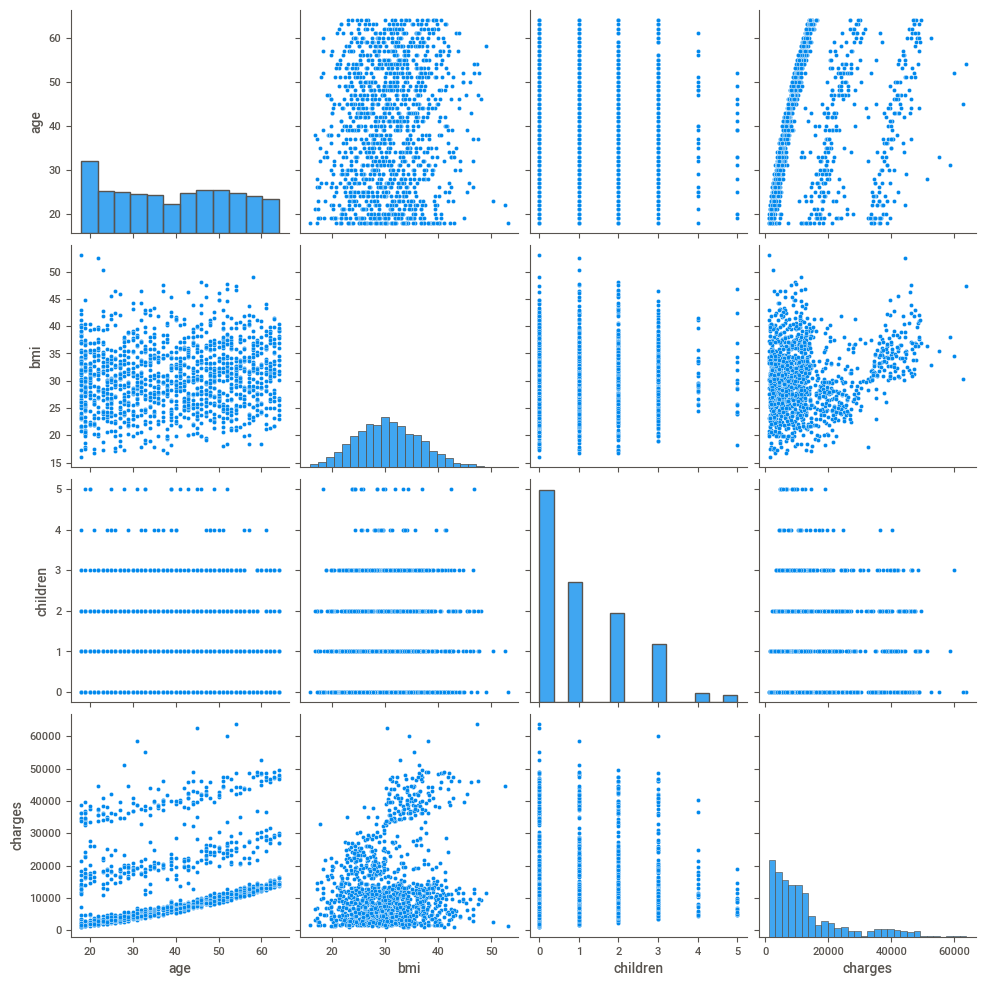

In [16]:
sns.pairplot(data)

# Data PreProcessing

### Checking missing values

In [17]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### There are no missing values

### Checking duplicate values

In [18]:
data.duplicated().sum()

1

##### There is 1 duplicate value. We will remove it

In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.duplicated().sum()

0

### Handle Categorical data

##### For converting categorical data to numerical data, we will use one hot encoding.

In [21]:
df1=pd.get_dummies(data['region'], prefix='region',drop_first=True)
data= pd.concat([data,df1], axis=1).drop(['region'],axis=1)

In [22]:
df2=pd.get_dummies(data['smoker'], prefix='smoker',drop_first=True)
data= pd.concat([data,df2], axis=1).drop(['smoker'],axis=1)

In [23]:
df3=pd.get_dummies(data['sex'], prefix='sex',drop_first=True)
data= pd.concat([data,df3], axis=1).drop(['sex'],axis=1)

In [24]:
data.head()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,smoker_yes,sex_male
0,19,27.900,0,16884.92400,0,0,1,1,0
1,18,33.770,1,1725.55230,0,1,0,0,1
2,28,33.000,3,4449.46200,0,1,0,0,1
3,33,22.705,0,21984.47061,1,0,0,0,1
4,32,28.880,0,3866.85520,1,0,0,0,1


### Handle Outliers

In [25]:
from scipy import stats
IQR = stats.iqr(data.bmi, interpolation = 'midpoint') 
Q1 = data.bmi.quantile(0.25) 
Q3 = data.bmi.quantile(0.75)
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [26]:
print('IQR:',IQR) 
print('Min Limit:',min_limit)
print('Max Limit:',max_limit)

IQR: 8.410000000000004
Min Limit: 13.674999999999994
Max Limit: 47.31500000000001


In [27]:
data.loc[data['bmi'] > max_limit] # We can see there are some outliers here.

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,smoker_yes,sex_male
116,58,49.06,0,11381.32540,0,1,0,0,1
286,46,48.07,2,9432.92530,0,0,0,0,0
401,47,47.52,1,8083.91980,0,1,0,0,1
543,54,47.41,0,63770.42801,0,1,0,1,0
847,23,50.38,1,2438.05520,0,1,0,0,1
860,37,47.60,2,46113.51100,0,0,1,1,0
1047,22,52.58,1,44501.39820,0,1,0,1,1
1088,52,47.74,1,9748.91060,0,1,0,0,1
1317,18,53.13,0,1163.46270,0,1,0,0,1


In [28]:
data.loc[data['bmi'] < min_limit]

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,smoker_yes,sex_male


In [29]:
data.loc[data['bmi'] > max_limit,'bmi']=np.median(data.bmi) # We will replace outliers with median.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


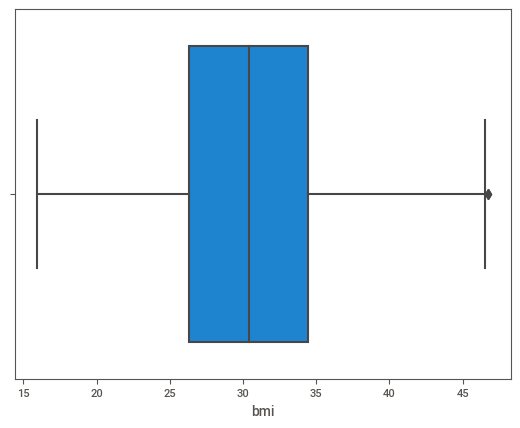

In [30]:
sns.boxplot(data.bmi)
plt.show()

In [31]:
data.shape

(1337, 9)

### Scaling the data

##### We will do scaling on bmi feature with MinMaxScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['age','children','charges','region_northwest','region_southeast','region_southwest','smoker_yes','sex_male']
data1=sc.fit_transform(data.drop(dl,axis=1))

In [33]:
data1

array([[0.38778824],
       [0.57843456],
       [0.55342644],
       ...,
       [0.67846703],
       [0.31958428],
       [0.42578759]])

In [34]:
data1.shape

(1337, 1)

In [35]:
con_data=data[['age','children','charges','region_northwest','region_southeast','region_southwest','smoker_yes','sex_male']]
con_data

,age,children,charges,region_northwest,region_southeast,region_southwest,smoker_yes,sex_male
0,19,0,16884.92400,0,0,1,1,0
1,18,1,1725.55230,0,1,0,0,1
2,28,3,4449.46200,0,1,0,0,1
3,33,0,21984.47061,1,0,0,0,1
4,32,0,3866.85520,1,0,0,0,1
...,...,...,...,...,...,...,...,...
1333,50,3,10600.54830,1,0,0,0,1
1334,18,0,2205.98080,0,0,0,0,0
1335,18,0,1629.83350,0,1,0,0,0
1336,21,0,2007.94500,0,0,1,0,0


In [36]:
data2=pd.DataFrame(data1,columns=['bmi']) # bmi column is in array so we will convert it into dataframe

In [37]:
final_df=pd.concat([con_data,data2],axis=1,join='inner') # concatenation of bmi and other columns.

In [38]:
final_df

,age,children,charges,region_northwest,region_southeast,region_southwest,smoker_yes,sex_male,bmi
0,19,0,16884.92400,0,0,1,1,0,0.387788
1,18,1,1725.55230,0,1,0,0,1,0.578435
2,28,3,4449.46200,0,1,0,0,1,0.553426
3,33,0,21984.47061,1,0,0,0,1,0.219065
4,32,0,3866.85520,1,0,0,0,1,0.419617
...,...,...,...,...,...,...,...,...,...
1332,52,3,11411.68500,0,0,1,0,0,0.487496
1333,50,3,10600.54830,1,0,0,0,1,0.518350
1334,18,0,2205.98080,0,0,0,0,0,0.678467
1335,18,0,1629.83350,0,1,0,0,0,0.319584


In [39]:
final_df.isnull().sum() 

age                 0
children            0
charges             0
region_northwest    0
region_southeast    0
region_southwest    0
smoker_yes          0
sex_male            0
bmi                 0
dtype: int64

# Feature Selection

<AxesSubplot:>

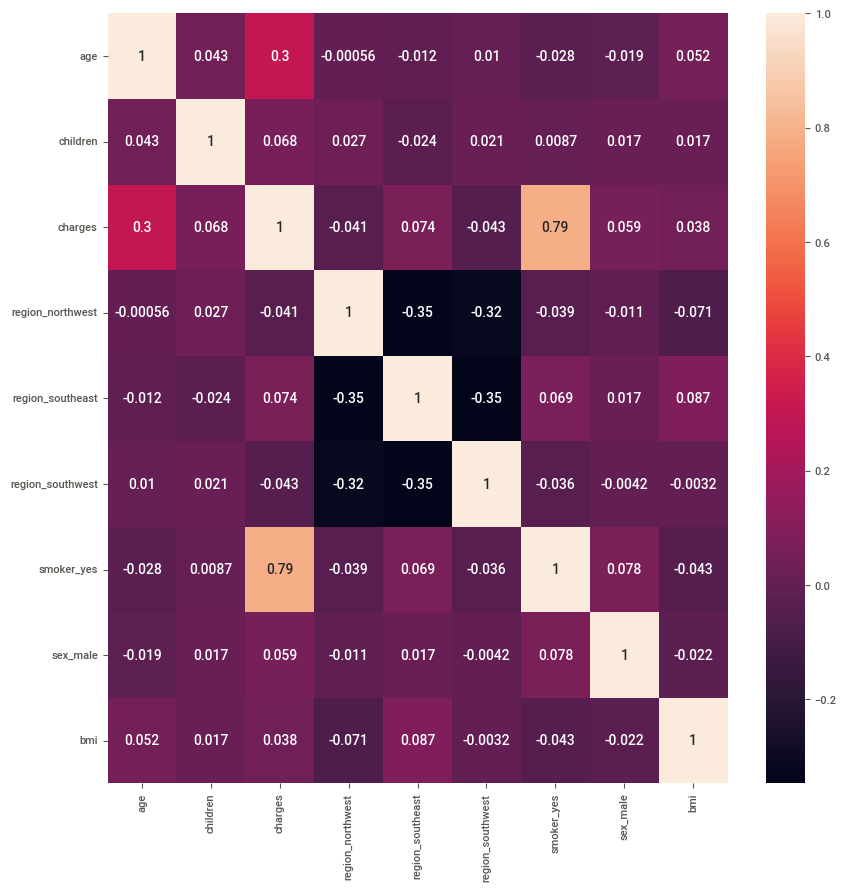

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(final_df.corr(),annot=True)

**Insights:**

There is no high (>90%) co-relation between any columns. 

# Model Creation

### Linear Regression

In [41]:
from sklearn.model_selection import train_test_split

X = final_df.drop(['charges'],axis=1)
y = final_df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1068, 8)
(268, 8)
(1068,)
(268,)


In [43]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
y_predict=LR.predict(X_test)

In [44]:
y_test

899      2117.33885
1063     6548.19505
1255     6474.01300
298     38746.35510
237      4463.20510
           ...     
534     13831.11520
542     13887.20400
896     19798.05455
1093    33907.54800
1284    47403.88000
Name: charges, Length: 268, dtype: float64

In [45]:
y_predict

array([ 1384.3095922 ,  8019.53731246,  9031.68983443, 30786.01928248,
        7657.63614769, 12396.53481559, 28479.02930929,  2308.49971385,
       10015.44158605, 33937.60414568, 12511.85898684, 33900.98130408,
        2491.66706277, 15464.45022654,  7429.59745707, 10121.57370033,
        3301.96675246, 31193.21398573,  6648.26549728,  5578.0978476 ,
        3363.90940468,  7231.28428866, 12650.99669344, 31012.49576243,
       34220.01133829,  4324.68813462,  6736.14516161,  3958.18754775,
       11098.19138537, 13092.7244736 ,  5711.62401973, 10131.2761014 ,
       25702.60247531, 13168.58071975, 34934.61622662,  4917.05879702,
        4888.52344988, 28685.19889827,  8474.04291961,  9974.6155606 ,
        4268.41729687, 12314.0500728 , 34322.77676909,  7421.37475594,
        9516.25995844, 25276.03644258,  9736.53936512, 13889.59904612,
        4765.78691608, 11484.45842538,  6271.17993665, 12701.96571097,
       13247.05608523,  2974.4169775 , 13309.86683952, 10291.81389763,
      

In [46]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [47]:
r2score

0.7806079804111267

In [48]:
X_test.shape

(268, 8)

In [49]:
adjusted_r2 = 1-(1-0.7806)*(268-1)/(268-8-1)
adjusted_r2

0.773823166023166

In [50]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))

38991013.389444694
6244.278452266899


In [51]:
print(mean_absolute_error(y_test,y_predict))

4264.97135963197


### KNN

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(1,20):
    
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 12773.424374833929
RMSE value for k=  2 is: 11168.48769650572
RMSE value for k=  3 is: 10723.34268082554
RMSE value for k=  4 is: 10776.995594704651
RMSE value for k=  5 is: 10667.304978575577
RMSE value for k=  6 is: 10848.919878545736
RMSE value for k=  7 is: 10798.313228254769
RMSE value for k=  8 is: 10927.306437858491
RMSE value for k=  9 is: 11093.56833496799
RMSE value for k=  10 is: 11232.052569687123
RMSE value for k=  11 is: 11341.622294328137
RMSE value for k=  12 is: 11333.289579988766
RMSE value for k=  13 is: 11479.104762008481
RMSE value for k=  14 is: 11506.113257827183
RMSE value for k=  15 is: 11605.729366360603
RMSE value for k=  16 is: 11681.414932294854
RMSE value for k=  17 is: 11698.982986414914
RMSE value for k=  18 is: 11743.911654520707
RMSE value for k=  19 is: 11809.96824630847


In [53]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [54]:
y_pred = knn.predict(X_test)

In [55]:
r2score=r2_score(y_test,y_pred)

In [56]:
r2score

0.3597262060738482

### SVM

In [57]:
from sklearn.svm import SVR
svregressor = SVR()
svregressor.fit(X_train, y_train)

SVR()

In [58]:
y_hat=svregressor.predict(X_test)

In [59]:
y_hat #predicted output data

array([9060.30154028, 9153.10112988, 9203.34005592, 9116.29796639,
       9115.77122538, 9262.7758384 , 9072.96675209, 9068.91844662,
       9212.04500951, 9278.61522241, 9339.86518914, 9286.14657582,
       9058.2187757 , 9344.06089106, 9145.01339764, 9229.33796085,
       9062.72519757, 9153.1298095 , 9129.87985902, 9102.748029  ,
       9062.76751909, 9122.67811269, 9262.77281078, 9177.89593011,
       9246.5244898 , 9065.74684837, 9086.36486228, 9091.20160107,
       9262.80191776, 9254.48268122, 9115.64229459, 9254.54038196,
       9076.94792917, 9330.47118066, 9300.39618686, 9068.98522636,
       9061.99070701, 9130.06600439, 9246.2495145 , 9237.85188282,
       9068.88827009, 9339.85461977, 9212.35913073, 9129.78253714,
       9237.87745876, 9063.02930435, 9186.21057124, 9325.04297497,
       9096.80212852, 9285.97246086, 9096.92023573, 9254.61812912,
       9344.03072193, 9062.76962598, 9313.41272141, 9220.73466808,
       9076.67387115, 9069.18667698, 9081.54977937, 9194.80393

In [60]:
r2score=r2_score(y_test,y_hat)

In [61]:
r2score

-0.17830342954823908

In [62]:
import math
print(mean_squared_error(y_test,y_hat))
print(math.sqrt(mean_squared_error(y_test,y_hat)))

209411649.9061302
14471.062500940634


In [63]:
print(mean_absolute_error(y_test,y_hat))

9554.986784402232


### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values

array([ 1728.897  ,  6746.7425 ,  6186.127  , 51194.55914,  4949.7587 ,
        8124.4084 , 35595.5898 ,  2154.361  , 19144.57652, 41999.52   ,
       13616.3586 , 23887.6627 , 11482.63485, 12981.3457 ,  6402.29135,
        8413.46305,  1964.78   , 39836.519  , 27375.90478,  4340.4409 ,
        1631.6683 ,  4934.705  ,  8547.6913 , 22144.032  , 39727.614  ,
        4296.2712 ,  4846.92015,  2897.3235 ,  9447.25035,  9563.029  ,
        3761.292  , 26236.57997, 18223.4512 , 12913.9924 , 27533.9129 ,
        4296.2712 ,  4234.927  , 15006.57945, 10156.7832 ,  8823.98575,
        2527.81865, 13616.3586 , 41034.2214 , 21984.47061,  8302.53565,
       16232.847  ,  7371.772  , 11566.30055,  5312.16985,  9625.92   ,
        4058.1161 ,  8083.9198 , 24513.09126, 11482.63485, 12032.326  ,
        8219.2039 ,  2457.502  , 16232.847  , 37165.1638 ,  7261.741  ,
       10381.4787 ,  6184.2994 , 12268.63225,  2203.73595, 10807.4863 ,
        4266.1658 ,  6067.12675, 13770.0979 , 34828.654  , 14235

In [65]:
y_train_predict=dt.predict(X_train)#predicting training data to check training performance 
y_train_predict

array([ 5312.16985,  7518.02535, 33471.97189, ...,  1964.78   ,
        7151.092  ,  5836.5204 ])

In [66]:
r2score=r2_score(y_test,y_hat)

In [67]:
r2score

0.5409002180308767

In [68]:
import math
print(mean_squared_error(y_test,y_hat))
print(math.sqrt(mean_squared_error(y_test,y_hat)))

81592602.04356623
9032.862339456206


In [69]:
print(mean_absolute_error(y_test,y_hat))

4805.981244697761


### Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor#importing randomforest

rf_clf = RandomForestRegressor(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestRegressor()

In [71]:
y_predict=rf_clf.predict(X_test) #testing

In [72]:
r2score=r2_score(y_test,y_predict)

In [73]:
r2score

0.746664562132741

In [74]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))

45023540.3658415
6709.958298368291


In [75]:
print(mean_absolute_error(y_test,y_predict))

4128.791690180224


### Hyperparameter tuning with linear

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Assuming you have your features X and target variable y

# Define the hyperparameters to tune
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create the Ridge regression model
ridge = Ridge()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train the model with the best hyperparameters
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_ridge.predict(X_test)


In [78]:
r2score=r2_score(y_test,y_pred)

In [79]:
r2score

0.779608688261761

In [80]:
import math
print(mean_squared_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred)))

39168610.61312175
6258.48309202172


In [81]:
print(mean_absolute_error(y_test,y_pred))

4285.333433173849


### Bagging with Linear Regression

In [82]:
from sklearn.ensemble import BaggingRegressor#import bagging 
model_bagg1=BaggingRegressor(base_estimator=LR,n_estimators=20) ## model objet creation
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
model_bagg1.fit(X_train,y_train) ## fitting the model
y_hat_bagg=model_bagg1.predict(X_test) ## getting the prediction

In [83]:
r2score=r2_score(y_test,y_hat_bagg)

In [84]:
r2score

0.7818062484916051

In [85]:
print(mean_squared_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))

39168610.61312175
6258.48309202172
4285.333433173849


### Boosting

In [86]:
import xgboost 

In [87]:
from xgboost import XGBRegressor#importing the model library
xgb_r=XGBRegressor() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price

In [88]:
r2score=r2_score(y_test,y_hat)

In [89]:
r2score

0.6838452309554435

In [90]:
print(mean_squared_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))

39168610.61312175
6258.48309202172
4285.333433173849


### ANN

In [91]:
from sklearn.neural_network import MLPRegressor

# Instantiate MLPRegressor with optional hyperparameters
# For example, you can set the number of hidden layers and neurons, activation function, etc.
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', learning_rate_init=0.01, max_iter=1000, random_state=42)

# Train the model
mlp_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_regressor.predict(X_test)

In [92]:
r2score=r2_score(y_test,y_hat)
r2score

0.6838452309554435

In [93]:
print(mean_squared_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))

39187439.663206704
6259.9871935337615
4381.0571114508875


# Cross Validation for Bagging with Linear Regression

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming model_bagg1 is your BaggingRegressor object and X_train, y_train are your training data

# Create BaggingRegressor object
model_bagg1 = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=20)

# Perform cross-validation
cv_scores = cross_val_score(model_bagg1, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.65780136 0.69395332 0.73836692 0.69042673 0.72026336]
Mean CV Score: 0.7001623382604575


# Residual plot of Bagging with linear Regression

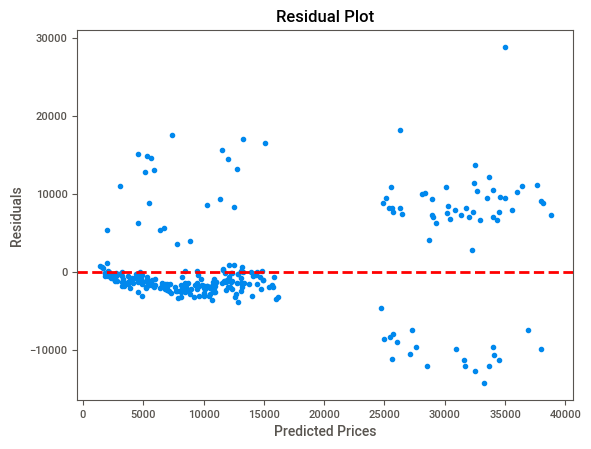

In [95]:
# Assuming y_true and y_pred are your actual and predicted prices
residuals = y_test - y_hat_bagg # means X_test (predicted prices using independent variable) - y_test(actual prices)

# Create a residual plot
plt.scatter(y_hat_bagg, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

**Insights**

Most of the points are clustered around the zero line, indicating that our model’s predictions are generally accurate.

In [97]:
# pearson correlation coefficient
corr = np.corrcoef(y_test, y_hat_bagg)[0, 1]
print('The correlation coefficient is', corr)

The correlation coefficient is 0.8919397491644248


**Insights**

A high correlation coefficient means that predicated values are every close to actual values.

# Evaluation Report

Based on the provided evaluation metrics, the performance of the models can be compared as follows:

**Linear Regression:** 
   R2 Score: 0.7806
   
**K-Nearest Neighbour (KNN):**
   R2 Score: 0.3597
   
**Support Vector Machine (SVM):**
   R2 Score: -0.1783

**Decision Tree:**
   R2 Score: 0.5637

**Random Forest:**
   R2 Score: 0.7427

**Xtreme Gradient Boosting (XGB):**
   R2 Score: 0.6838

**Artificial Neural Network (ANN):**
   R2 Score: 0.6838
   
   





**As we can see,linear regression is giving best R2 Score, we will check hyperparameter tuning and bagging of it**

**After Hyperparameter Tuning of Linear Regression:**
   R2 Score: 0.7796
   
**Bagging with Linear Regression:**
   R2 Score: 0.7832


**Based on the R2 score, Bagging with Linear Regression, achieves the highest performance with an R2 score of 0.7832. This suggests that the Bagging with Linear Regression, provides the best fit to the data among the models considered.**

